In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
#Zadatak 1: 
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=1/s(s+1)
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#d) Dizajnirati diferencijalni kopmenzator koji obezbedjuje brzinsku konstantu > 10, i faznu marginu >45 stepeni
#e) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#f) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom

In [4]:
W= signal.lti([],[0,-1],1)

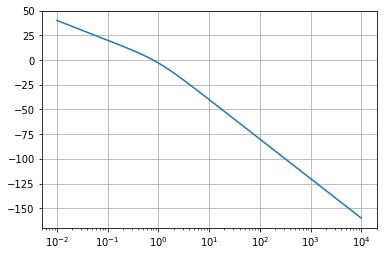

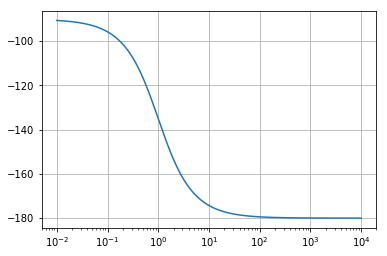

In [7]:
# a)

w_log =np.logspace(-2,4,num=1000)
w , mag, phase = signal.bode(W, w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w,mag)
plt.figure()
plt.grid()
plt.semilogx(w,phase)
plt.show()

In [8]:
# b) Brzinsa konstanta
# kv = lim(S *W(s)) s->0
kv =1

In [11]:
# Presecna ucestanost pojacanja
w1 = w[mag[:] >= 0][-1]
print("Presecna ucestanost pojacanja:", round(w1,2))

Presecna ucestanost pojacanja: 0.78


In [12]:
# Presecna ucestanost faze
w_pi = w[phase[:] >= -180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))

Presecna ucestanost faze: 10000.0


In [19]:
# Amplitudska margina
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))

Amplitudska margina: 100000000.5


In [20]:
# Fazna margina
PM=180 + phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Fazna margina: 52.06


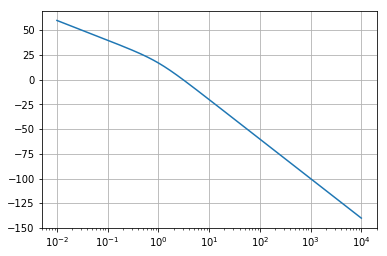

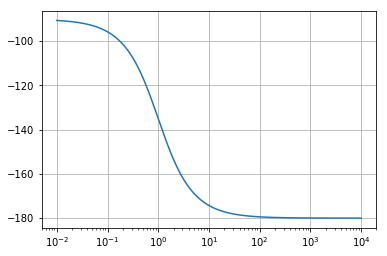

In [22]:
# d)
# K=10
W1 = signal.lti([],[0,-1],10)
w,mag,phase= signal.bode(W1,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w,mag)
plt.figure()
plt.grid()
plt.semilogx(w,phase)
plt.show()

In [24]:
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Presecna ucestanost pojacanja: 3.07
Fazna margina: 18.07


In [25]:
#Potrebno je povecati je za 27 stepeni
# Biramo otprilike 1/alpha=5  (obezbedjuje maksimalno fazno prednjacanje od 45)
# Biramo nulu tako da postize maksimalnu fazu oko NOVE presecne ucestanosti - isprobavanjem
# Prvo probamo a=1, b=5, znaci D(s)=10(s+1)/(s/5+1)=50(s+1)/(s+5)

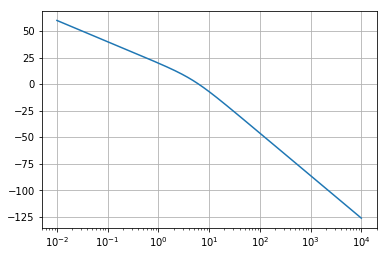

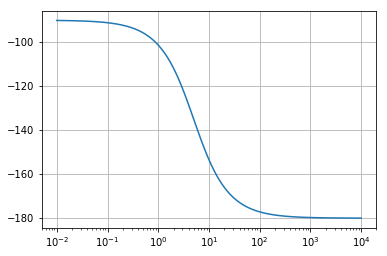

Presecna ucestanost pojacanja: 6.21
Fazna margina: 38.86


In [26]:
W2=signal.lti([-1], [0, -1, -5], 50)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

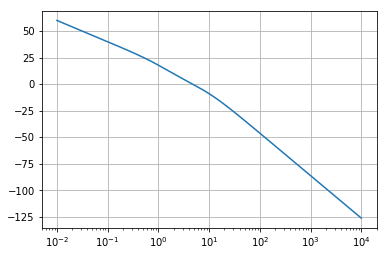

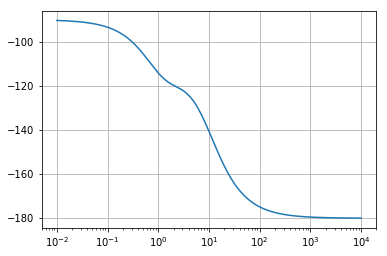

Presecna ucestanost pojacanja: 4.77
Fazna margina: 53.59


In [27]:
# Fazna margina ne zadovoljava - previse je pomerena presecna ucestanost pojacanja, 
# biramo vecu nulu a=2, znaci b=10: D(s)=(s/2+1)/(s/10+1)=5(s+2)/(s+10)
W2=signal.lti([-2], [0, -1, -10], 50)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

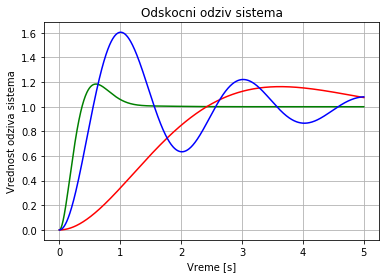

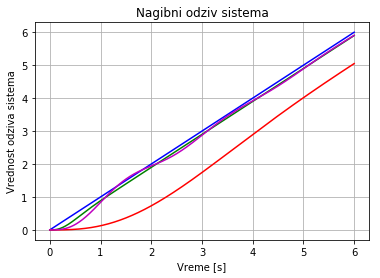

In [30]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=50(s+2)/s(s+1)(s+10)

brojilac=[50, 100]
imenilac1=sp.convolve(sp.convolve([1,0],[1,1]),[1,10])
imenilac=imenilac1+[0, 0, 50, 100]
W3=signal.lti(brojilac,imenilac)

W4=signal.lti([1],[1, 1, 1])

# Da smo primenili samo pojacanje K=10:
W5=signal.lti([10],[1, 1, 10])

t=np.linspace(0,5,1000)

tt,y1=W3.step(T=t)
tt,y2=W4.step(T=t)
tt,y3=W5.step(T=t)
plt.plot(tt,y1,'g',tt,y2,'r',tt,y3,'b')
plt.title("Odskocni odziv sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

# Odzivi na jedinicne nagibne pobude
t=np.linspace(0,6,1000)
tt,y1,x1=signal.lsim(W3,t,t)
tt,y2,x2=signal.lsim(W4,t,t)
tt,y3,x3=signal.lsim(W5,t,t)
plt.plot(tt,tt,'b',tt,y1,'g',tt,y2,'r',tt,y3,'m')
plt.title("Nagibni odziv sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

In [31]:
#Zadatak 2:
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=50000/s(s+10)(s+50) 
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#d) Dizajnirati diferencijalni kopmenzator koji obezbedjuje propusni opseg > 20 rad/s, i faznu marginu >50 stepeni
#e) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#f) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom

In [32]:
W=signal.lti([], [0, -10, -50], 50000)

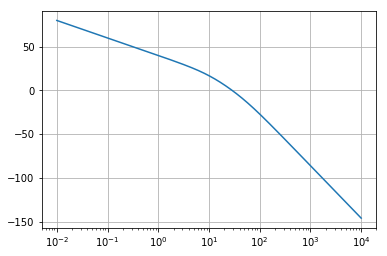

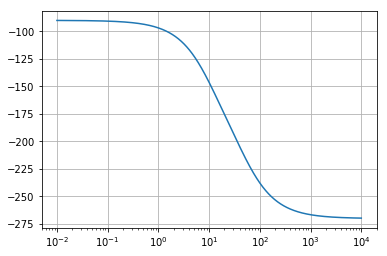

In [33]:
# a)
w_log=np.logspace(-2,4,num=1000)
w, mag, phase = signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [34]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
# presecna ucestanost faze
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))
# amplitudska margina
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Presecna ucestanost pojacanja: 28.41
Presecna ucestanost faze: 22.15
Amplitudska margina: 0.59
Fazna margina: -10.21


In [35]:
#Potrebno je povecati faznu marginu za 60 stepeni
# Biramo otprilike 1/alpha=20  (obezbedjuje maksimalno fazno prednjacanje od 65)
# Biramo nulu tako da postize maksimalnu fazu oko trazene presecne ucestanosti - isprobavanjem
# Prvo probamo a=5, b=100, znaci D(s)=(s/5+1)/(s/100+1)=20(s+5)/(s+100)

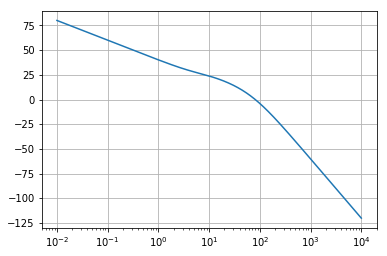

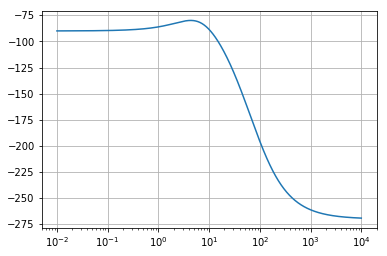

Presecna ucestanost pojacanja: 80.15
Fazna margina: -3.21


In [36]:
W2=signal.lti([-5], [0, -10, -50, -100], 20*50000)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

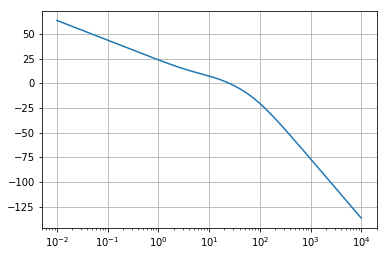

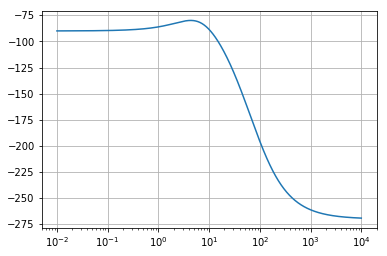

Presecna ucestanost pojacanja: 24.4
Fazna margina: 60.98


In [37]:
# nova presecna ucestanost je prevelika - mozemo da unesemo slabljenje (dozvoljeno je jer pojacanje nije specificirano)
#isprobavanjem dobijamo da prihvaljtive parametre za K=0.15:
W2=signal.lti([-5], [0, -10, -50, -100], 0.15*20*50000)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

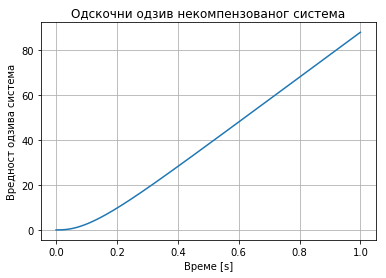

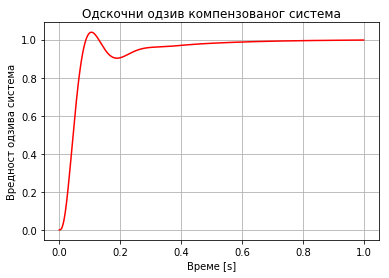

In [38]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=0.15*20*50000(s+5)/s(s+10)(s+50)(s+100)

brojilac=[0.15*20*50000, 0.15*20*50000*5]
imenilac1=sp.convolve(sp.convolve(sp.convolve([1,0],[1,10]),[1,50]),[1,100])
imenilac=imenilac1+[0, 0, 0, 0.15*20*50000, 0.15*20*50000*5]
G2=signal.lti(brojilac,imenilac)

# originlni sistem je nestabilan

imenilac2=sp.convolve(sp.convolve([1,0],[1,10]),[1,50])
G1=signal.lti([50000],imenilac2)


t=np.linspace(0,1,1000)

tt,y1=G1.step(T=t)
tt,y2=G2.step(T=t)
plt.plot(tt,y1)
plt.title("Odskocni odziv nekompenzovanog sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

plt.plot(tt,y2,'r')
plt.title("Odskocni odziv kompenzovanog sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

In [40]:
#Zadatak 3:
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=5/s(s+1)(s/5+1) 
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#d) Dizajnirati diferencijalni kopmenzator koji obezbedjuje presecnu ucestanost pojacanja priblizno = 2.5 rad/s, i faznu marginu >40 stepeni
#e) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#f) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom

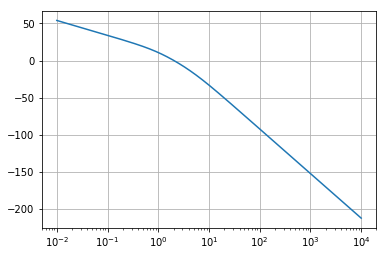

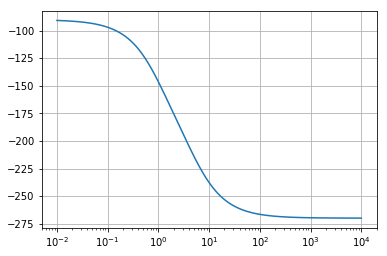

In [54]:
W=signal.lti([], [0, -1 , -5], 25)
# a)
w_log=np.logspace(-2,4,num=1000)
w, mag, phase = signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [55]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
# presecna ucestanost faze
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))
# amplitudska margina 
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Presecna ucestanost pojacanja: 2.02
Presecna ucestanost faze: 2.23
Amplitudska margina: 1.19
Fazna margina: 4.25


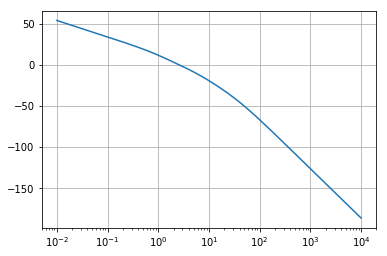

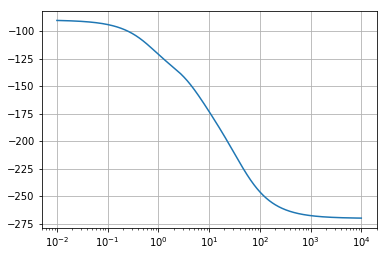

Presecna ucestanost pojacanja: 2.6
Fazna margina: 42.3


In [74]:
#Potrebno je povecati faznu marginu za 55 stepeni
# Biramo otprilike 1/alpha=20  (obezbedjuje maksimalno fazno prednjacanje od 65)
# Biramo nulu tako da postize maksimalnu fazu oko trazene presecne ucestanosti - isprobavanjem
# Prvo probamo a=1, b=20, znaci D(s)=(s/1+1)/(s/20+1)=20(s+1)/(s+20)
W2=signal.lti([-2], [0, -1 ,-5,-40], 25*20)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

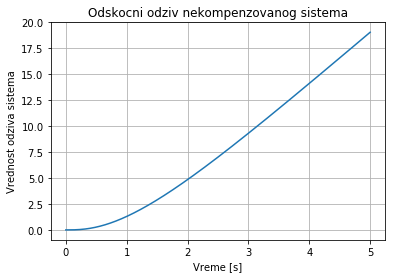

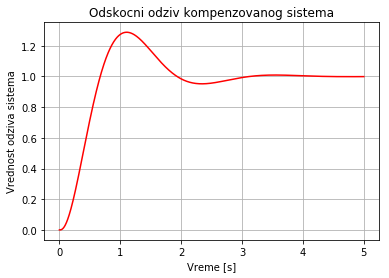

In [78]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=0.15*20*50000(s+5)/s(s+10)(s+50)(s+100)

brojilac=[20*25, 20*25*2]
imenilac1=sp.convolve(sp.convolve(sp.convolve([1,0],[1,1]),[1,5]),[1,40])
imenilac=imenilac1+[0,0,0,20*25, 20*25*2]
G2=signal.lti(brojilac,imenilac)

# originlni sistem je nestabilan

imenilac2=sp.convolve(sp.convolve([1,0],[1,1]),[1,5])
G1=signal.lti([25],imenilac2)


t=np.linspace(0,5,1000)

tt,y1=G1.step(T=t)
tt,y2=G2.step(T=t)
plt.plot(tt,y1)
plt.title("Odskocni odziv nekompenzovanog sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

plt.plot(tt,y2,'r')
plt.title("Odskocni odziv kompenzovanog sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()